## 3c. Explainable Artificial Intelligence (XAI) - Shapley Additive Explanation (SHAP) using DeepSHAP for Keras Neural Network

### Load Data and the Saved Model

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

# Load the data
df = pd.read_csv("../preprocessed/clean_survey.csv")

# Split to independent and dependent variables
X = df.drop(['q_031_adjusted', 'invol_score', 'q_031', 'involvement_level'] + [f'q_0{i}' for i in range(45, 55)], axis=1)
y = df["involvement_level"]

# Encode the class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_encoded_train, y_encoded_test = train_test_split(X, y_encoded, stratify=y_encoded, random_state=42)

# Data Preprocessing
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store in dataframe for plotting
feature_names = X_train.columns.tolist()
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mapping)

2024-09-26 19:43:49.723326: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-26 19:43:49.790086: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-26 19:43:49.791871: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 19:43:50.933959: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


{0: 'High', 1: 'Low', 2: 'Medium'}


In [2]:
print("Shape of X_train_scaled:", X_train_scaled.shape)  # Should be (num_samples, num_features)
print("Shape of y_encoded_train:", y_encoded_train.shape)  # Should be (num_samples,)

Shape of X_train_scaled: (656, 91)
Shape of y_encoded_train: (656,)


In [3]:
"""import numpy as np
import tensorflow as tf
import random

# Improve stability
def reset_random_seeds():
   tf.random.set_seed(42)
   np.random.seed(42)
   random.seed(42)

reset_random_seeds()"""

'import numpy as np\nimport tensorflow as tf\nimport random\n\n# Improve stability\ndef reset_random_seeds():\n   tf.random.set_seed(42)\n   np.random.seed(42)\n   random.seed(42)\n\nreset_random_seeds()'

In [4]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('../models/neural_1_tensor.h5')

In [5]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               17664     
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                6176      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1

In [6]:
"""from sklearn.utils.class_weight import compute_class_weight
import numpy as np
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded_train), y=y_encoded_train)
class_weights = dict(enumerate(class_weights))
# Model training
history = model.fit(X_train_scaled, y_encoded_train, epochs=50, 
                    class_weight=class_weights, validation_split=0.2, batch_size=32)"""

"from sklearn.utils.class_weight import compute_class_weight\nimport numpy as np\nclass_weights = compute_class_weight('balanced', classes=np.unique(y_encoded_train), y=y_encoded_train)\nclass_weights = dict(enumerate(class_weights))\n# Model training\nhistory = model.fit(X_train_scaled, y_encoded_train, epochs=50, \n                    class_weight=class_weights, validation_split=0.2, batch_size=32)"

In [7]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, hamming_loss
import numpy as np

# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions
# y_test_labels = np.argmax(y_encoded_test, axis=1)  # Convert one-hot to labels for evaluation

# Calculate various metrics
print("Accuracy:", accuracy_score(y_encoded_test, y_pred))
print("Hamming Loss:", hamming_loss(y_encoded_test, y_pred))
print("F1 Score (Micro):", f1_score(y_encoded_test, y_pred, average='micro'))
print("F1 Score (Macro):", f1_score(y_encoded_test, y_pred, average='macro'))
print("F1 Score (Weighted):", f1_score(y_encoded_test, y_pred, average='weighted'))
# ROC-AUC for multi-class
roc_auc = roc_auc_score(y_encoded_test, y_pred_prob, average='macro', multi_class='ovr')
print("ROC-AUC (Macro):", roc_auc)

7/7 [==============================] - 0s 2ms/step
Accuracy: 0.6666666666666666
Hamming Loss: 0.3333333333333333
F1 Score (Micro): 0.6666666666666666
F1 Score (Macro): 0.5990280327418168
F1 Score (Weighted): 0.6684647477821015
ROC-AUC (Macro): 0.8151189053000794


In [8]:
X_test_scaled

array([[ 0.43314013,  1.29767626, -0.64326752, ..., -0.18185397,
        -0.51851596,  3.30564256],
       [-1.69282549,  0.03652718, -0.64326752, ..., -0.18185397,
         1.92858094, -0.30251305],
       [ 0.52557342,  0.03652718, -0.64326752, ..., -0.18185397,
        -0.51851596, -0.30251305],
       ...,
       [ 1.4499063 ,  1.29767626,  1.55456318, ..., -0.18185397,
        -0.51851596, -0.30251305],
       [-0.76849261, -1.22462189, -0.64326752, ..., -0.18185397,
        -0.51851596, -0.30251305],
       [ 1.35747301,  1.29767626,  1.55456318, ..., -0.18185397,
         1.92858094, -0.30251305]])

In [9]:
y_encoded_test

array([2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2])

In [10]:
label_mapping

{0: 'High', 1: 'Low', 2: 'Medium'}

In [11]:
"""def model_predict(data):
    # Ensure the data is in the correct shape and type (numpy array if necessary)
    data = data.astype(np.float32)  # Ensure the data type matches what the model expects
    # Model prediction
    predictions = model.predict(data)
    # Since we're using softmax output, we might want to return just one class's probability,
    # or we can return the probabilities as is, depending on what we want to explain
    return predictions

# Create a KernelExplainer using the wrapped prediction function
shap_explainer = shap.KernelExplainer(model_predict, X_train_scaled)  # Use a subset for the background to save computation

# Compute SHAP values (using a subset of X_test_scaled for efficiency)
shap_values = shap_explainer.shap_values(X_test_scaled)  # Adjust subset size as needed"""

"def model_predict(data):\n    # Ensure the data is in the correct shape and type (numpy array if necessary)\n    data = data.astype(np.float32)  # Ensure the data type matches what the model expects\n    # Model prediction\n    predictions = model.predict(data)\n    # Since we're using softmax output, we might want to return just one class's probability,\n    # or we can return the probabilities as is, depending on what we want to explain\n    return predictions\n\n# Create a KernelExplainer using the wrapped prediction function\nshap_explainer = shap.KernelExplainer(model_predict, X_train_scaled)  # Use a subset for the background to save computation\n\n# Compute SHAP values (using a subset of X_test_scaled for efficiency)\nshap_values = shap_explainer.shap_values(X_test_scaled)  # Adjust subset size as needed"

### 3.1 Compute Shapley Values (Using Testing Set)

In [12]:
X_train.values

array([[0.28, 2.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.76, 2.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.6 , 2.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.78, 2.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.71, 3.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.67, 2.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [13]:
import shap
shap.initjs()
# Make sure the input data is in the correct format (e.g., a NumPy array)

shap_explainer = shap.DeepExplainer(model, X_train_scaled)
shap_values = shap_explainer.shap_values(X_test_scaled)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [14]:
import pickle
# Save shap values using pickle
with open('../shaps/shap_values_deep.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

In [15]:
shap_values

[array([[ 0.0039332 , -0.00428478, -0.00087808, ...,  0.00012781,
         -0.00720265, -0.02535841],
        [-0.00070439, -0.00088882,  0.00341947, ...,  0.00031423,
          0.00267986,  0.00094774],
        [-0.00045402,  0.00438127,  0.00119201, ..., -0.0001406 ,
         -0.00230818,  0.00063018],
        ...,
        [ 0.07535728,  0.05676716,  0.11894098, ...,  0.0041971 ,
         -0.01887751,  0.01287793],
        [ 0.00148455,  0.00217061,  0.00456945, ..., -0.00012313,
          0.00014558,  0.00233525],
        [-0.0028306 , -0.01799221,  0.01437432, ...,  0.00861776,
          0.03484212,  0.03294131]]),
 array([[-4.32226571e-02,  1.52734444e-02, -5.57628900e-03, ...,
          1.41075281e-02,  1.97060476e-02, -9.09059215e-02],
        [-6.70408027e-03, -7.56868574e-04, -7.96514308e-03, ...,
          7.34458901e-04,  2.04332396e-02, -1.88699921e-03],
        [-4.09864534e-03,  1.39355641e-02, -1.02607460e-03, ...,
          6.74824468e-04, -3.46356673e-03, -2.76405566e-

In [16]:
# Retrieve feature names after dropping columns
feature_names = X.columns.tolist()
expected_value = np.array(shap_explainer.expected_value)
# shap_values_scaled = [np.array(sv) for sv in shap_values_scaled]

### 3.2 SHAP Force Plot
Force plots show the contribution of each feature to the model prediction for individual predictions.

### 3.2a) Force Plots for 'Low' Class
- Make a force plot for the first instance in test set (X_test.iloc[0]):
- explainer.expected_value[1]: The expected value for Class 'Low' (index 1). This value is the reference from which the SHAP values start (baseline prediction before taking into account the effect of any features).
- shap_values[1][0]: The SHAP values for the first instance with respect to the second class.
- X_test.iloc[0]: The actual feature values of the first instance in the test set.


In [17]:
# force plot for the first instance in test set, using 'Low' class
# Use the unscaled X_test data for more interpretable visualization
# Set the default size for plots generated by matplotlib
# Create the force plot as an HTML object
f = shap.plots.force(
    expected_value[1], 
    shap_values[1][0], 
    X_test.iloc[0], 
    feature_names=feature_names,
    show=False
)

# Save the plot to an HTML file
shap.save_html("../figures/force_plot.html", f)

In [18]:
shap.force_plot(
    expected_value[1],  # Using the expected value for the class 'Low'
    shap_values[1][0],  # SHAP values for a random instance, for 'Low'
    X_test.iloc[0],  # Original, unscaled feature values of the test instance
    feature_names=feature_names
)

### Local Observation
From the force plot we can see the baseline expected probability of predicting class 'Low', before considering the effect of any specific features of the instance being explained is 0.25. q_130_VIC=1 has the strongest positive effect and q_025=1 has the strongest negative impact.
- q_116: Profits from renewables go to external investors (Stongly agree)
- q_034: I intend to install a solar PV system within the next 1-2 years (Disagree)
- q_105: Enabling community sponsorship and granting opportunities is a main benefit of renewable energy (NO)
- q_013: Grid transmission problems are an obstacle in achieving RE target (Likely)
#### Comments: 
This means for this particular instance, thinking profits from renewables go to external investors and **not** planning to install solar PV in next 1-2 years etc contribute to a higher probability of a Low Participation. Conversely, **not** seeing community sponsorship and granting opportunities as RE benefit and thinking grid transmission problems could create obstacles etc deviate the prediction from a Low Participation.

In [19]:
# force plot for the first instance in test set, using 'Low' class
# Use the unscaled X_test data for more interpretable visualization
shap.force_plot(
    expected_value[1],  # Using the expected value for the class 'Low'
    shap_values[1][:20],  # SHAP values for the first 10 test instance, for 'Low'
    X_test.iloc[:20],  # Original, unscaled feature values of the first 10 test instance
    feature_names=feature_names # Feature names
)

### Global (Aggregated) Observation
#### Comments:
Once the effects are aggregated for the first 20 instances, the impact of features on the prediction for instance 0 become relatively small. That means for instance 0, the feature values do not significantly push the model's output away from the base value when comparing with more other instances (although the absolute impact might still seem large). We now see instances at index 10 and 11 show (original sample ordering) some more influential features.

Positive predicting features (higher probability of **Low Participation**) include:
- q_018: Financial constraints and considerations create obstacles in achieving your preferred RE target (Very likely)
- q_023: Have an electric vehicle (YES)
- q_006: Medium & large scale corporate-owned renewables projects to achieve renewable energy target (YES)
- q_105: Enabling community sponsorship and granting opportunities is a main benefit of renewable energy (YES) (opposite response so opposite direction to instance 0)

Negative predicting features (lower probability of **Low Participation**) include:
- q_104: Keeping money in the regional communities is a main benefit of renewable energy (No)
- q_030: Facing electricity grid issues (YES)
- q_005: Small & medium scale community-owned renewable projects to achieve RE target (No)
- q_039: Personal financial benefit is an important factor to participate in community energy group/project (Very important)

### 3.2b) Force Plots for 'Medium' Class

In [20]:
# force plot for the first instance in test set, using 'Medium' class
# Use the unscaled X_test data for more interpretable visualization
shap.force_plot(
    expected_value[2],  # Using the expected value for the class 'Medium'
    shap_values[2][0],  # SHAP values for the first test instance, for 'Medium'
    X_test.iloc[0],  # Original, unscaled feature values of the first test instance
    feature_names=feature_names # Feature names
)

### Local Observation
From the force plot we can see the baseline expected probability of predicting class 'Medium', before considering the effect of any specific features of the instance being explained is 0.71. q_025=1 has the strongest positive effect and q_130_VIC=1 has the strongest negative impact.
- q_105: Enabling community sponsorship and granting opportunities is a main benefit of renewable energy (YES)
- q_130_WA: Which state do you live in (Western Australia)
- q_116: Profits from renewables go to external investors (Stongly agree)
- q_034: I intend to install a solar PV system within the next 1-2 years (Disagree)
#### Comments: 
This means for this particular instance (index 0), **not** seeing community sponsorship and granting opportunities as RE benefit and living in Western Austrlia etc associate with a higher probability of a Medium Participation. Conversely, thinking profits from renewables go to external investors and **not** planning to install solar PV in next 1-2 years etc associate with a prediction deviation from a Medium Participation.

In [21]:
# force plot for the first instance in test set, using 'Medium' class
# Use the unscaled X_test data for more interpretable visualization
shap.force_plot(
    expected_value[2],  # Using the expected value for the class 'Medium'
    shap_values[2][:20],  # SHAP values for the first 10 test instance, for 'Medium'
    X_test.iloc[:20],  # Original, unscaled feature values of the first 10 test instance
    feature_names=feature_names # Feature names
)

### Glogal (Aggregated) Observation
#### Comments:
Once the effects are aggregated for the first 20 instances, the impact of features on the prediction for instance 0 become relatively small. That means for instance 0, the feature values do not significantly push the model's output away from the base value when comparing with more other instances (although the absolute impact might still seem large). We now see instances at index 10 and 11 show (original sample ordering) some more influential features.

Positive predicting features (higher probability of **Medium Participation**) include:
- q_094: Have any of your friends, neighbours or others you know already got household renewable energy? (Yes, more than 7 households I know)
- q_092: There are some really big divisions in my community about coal or gas (Agree)
- q_005: Small & medium scale community-owned renewable projects to achieve RE target (No)
- q_107: Enabling new businesses based on cheaper energy is a benefit of RE (NO)

Negative predicting features (lower probability of **Medium Participation**) include:
- q_018: Financial constraints and considerations create obstacles in achieving your preferred RE target (Very likely)
- q_023: Have an electric vehicle (YES)
- q_006: Medium & large scale corporate-owned renewables projects to achieve renewable energy target (YES)
- q_105: Enabling community sponsorship and granting opportunities is a main benefit of renewable energy (YES) (opposite response so opposite direction to instance 0)

### 3.2c Force Plots for 'High' Class 

In [22]:
# force plot for the first instance in test set, using 'High' class
# Use the unscaled X_test data for more interpretable visualization
shap.force_plot(
    expected_value[0],  # Using the expected value for the class 'High'
    shap_values[0][0],  # SHAP values for the first test instance, for 'High'
    X_test.iloc[0],  # Original, unscaled feature values of the first test instance
    feature_names=feature_names # Feature names
)

### Local Observation
From the force plot we can see the baseline expected probability of predicting class 'High', before considering the effect of any specific features of the instance being explained is 0.04. q_024=1 has the strongest positive effect and q_021=0 has the strongest negative impact.
- q_025: Wanting to generate some or more renewable energy but currently have barriers (YES)
- q_083: Environmental problems are frequently exaggerated (Strongly Agree)
- q_021: I have renewable energy installed (including solar PV, solar hot water, wind or bioenergy generators) (No)
- q_130_WA: Which state do you live in (Western Australia)
#### Comments: 
This means for this particular instance, Wanting to generate some or more renewable energy but currently have barriers and **agreeing environmental problems are frequently exaggerated** etc associate with a higher High Participation probability. Conversely, not having renewable energy installed and living in Western Australia associate with a lower probability of High Participation.

In [23]:
# force plot for the first instance in test set, using 'High' class
# Use the unscaled X_test data for more interpretable visualization
shap.force_plot(
    expected_value[0],  # Using the expected value for the class 'High'
    shap_values[0][:20],  # SHAP values for the first 10 test instances, for 'High'
    X_test.iloc[:20],  # Original, unscaled feature values of the first 10 test instance
    feature_names=feature_names # Feature names
)

### Global (Aggregated) Observation
#### Comments:
Once the effects are aggregated for the first 20 instances, the impact of features on the prediction for instance 0 become relatively small. That means for instance 0, the feature values do not significantly push the model's output away from the base value when comparing with more other instances (although the absolute impact might still seem large). We now see instances at index 13 and 16 show (original sample ordering) some more influential features.

Positive predicting features (higher probability of **High Participation**) include:
- q_005: Small & medium scale community-owned renewable projects to achieve RE target (YES)
- q_106: Enabling local participation in energy decision making is a main RE benefit (YES)
- q_086: Personally, I feel responsible for climate change (Don't know)
- q_094: Have any of your friends, neighbours or others you know already got household renewable energy? (Yes, more than 7 households I know)

Negative predicting features (lower probability of **Medium Participation**) include:
- q_018: Financial constraints and considerations create obstacles in achieving your preferred RE target (Not very likely)
- q_011: Fossil fuel sector can create obstacle in achieving RE target (YES)
- q_110: The financial costs of joining a community energy project are too high (Strongly agree)
- q_007: RE target should be achieved by transition to electric vehicles (No)

### 3.3 SHAP Feature Importance Plot
This plot shows the most important features that influence the model's predictions. Green is class 'High', Blue is class 'Low' and Pink is class 'Medium'.

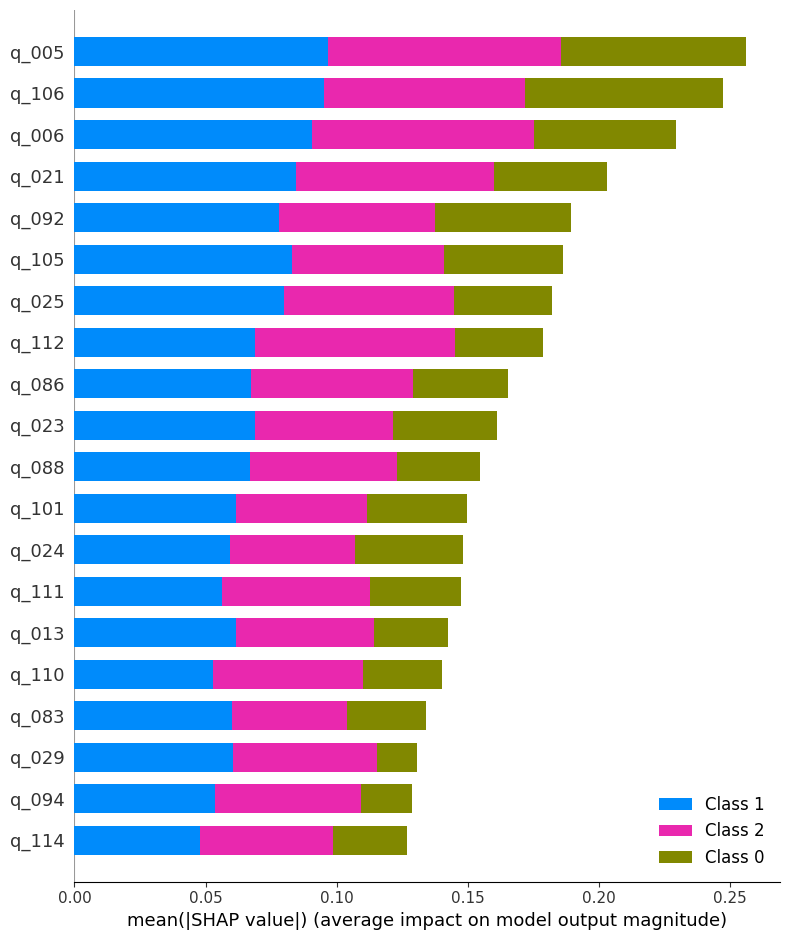

In [24]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist(), show=False)

In [25]:
shap.initjs
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist(), show=False)
plt.savefig("../figures/deep_summary_plot.png")  # Saves the plot as a PNG file
plt.close()  # Closes the plot to free up memory


The top 3 overeall (average) influential factors are q_005, q_106 and q_006, meaning they have a higher average impact on model output, indicating they are more important for the model's decisions. Besides, the plot shows that a feature that is highly influential for one class may be less so for another. To inspect more specifically, we plot the class-wise percentage contribution plot. 

- q_005: Small & medium scale community-owned renewable projects to achieve RE target
- q_106: Enabling local participation in energy decision making is a main RE benefit
- q_006: Medium & large scale corporate-owned renewables projects to achieve RE target

1. Convert SHAP values to absolute values, sums values for each feature within each predicted class
2. Calculate percentage contribution of each feature to the SHAP values for each class
3. Build a dataframe of percentage contributions of each feature by class.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert to absolute values for percentage calculation, shape = 3 (num of classes) * 219
absolute_shap_values = [np.abs(values) for values in shap_values]

# standardise values (no difference once individual values are aggregated)
#max_shap_values_by_class = np.array([values.max() for values in absolute_shap_values])
#absolute_shap_values = [values / max_shap for values, max_shap in zip(absolute_shap_values, max_shap_values_by_class)]

# Step 2: Calculate the sum of SHAP values for all features in each class, shape = 3 (num of classes)
total_shap_values_per_class = np.array([values.sum() for values in absolute_shap_values])
# Calculate the percentage contribution of each feature to each class, shape = 3 (num of classes) * 219
percentage_contributions = [values / total for values, total in zip(absolute_shap_values, total_shap_values_per_class)]


# Step 3: Create a DataFrame for each class and concatenate them
feature_names = X_train.columns.tolist()
class_contributions = []
for i, class_percentage in enumerate(percentage_contributions):
    df = pd.DataFrame(class_percentage, columns=feature_names)
    df_sum = df.sum(axis=0)  # Sum over all samples
    class_contributions.append(df_sum)

# Combine into a single DataFrame for plotting
df_contributions = pd.concat(class_contributions, axis=1)
df_contributions.columns = [f'Class {i}' for i in range(len(class_contributions))]

# Rename columns
rename_dict = {
    'Class 0': 'High',
    'Class 1': 'Low',
    'Class 2': 'Medium'
}
df_contributions.rename(columns=rename_dict, inplace=True)

# reorder the columns
df_contributions = df_contributions[['Low', 'Medium', 'High']]
df_contributions


,Low,Medium,High
q_000,0.006682,0.006387,0.005083
q_001,0.006321,0.007132,0.005983
q_003,0.006971,0.006263,0.007350
q_004,0.005091,0.005086,0.004162
q_005,0.026123,0.026611,0.037883
...,...,...,...
q_130_QLD,0.012475,0.013203,0.007462
q_130_SA,0.007064,0.007257,0.007046
q_130_TAS,0.002916,0.002104,0.003325
q_130_VIC,0.005306,0.005538,0.005707


4. Compute mean absolute SHAP values for each feature 
5. Extract the top 20 (overall) significant features consistent with the feature importance plot.

In [27]:
# Step 4: Calculate mean absolute SHAP values for each feature
# If shap_values is a multi-output (e.g., for multi-class classification), you need to aggregate across all classes.
# This code assumes shap_values is structured with one element per class (for multi-class) or just a single array for binary.
if isinstance(shap_values, list):  # Multi-class scenario
    # Aggregate SHAP values across all classes, then compute the mean absolute value for each feature
    aggregated_shap = np.sum([np.abs(values) for values in shap_values], axis=0)
else:  # Binary classification scenario
    aggregated_shap = np.abs(shap_values)

mean_abs_shap_values = np.mean(aggregated_shap, axis=0)

# Create a DataFrame for easier manipulation and visualization
df_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'MeanAbsSHAP': mean_abs_shap_values
}).sort_values(by='MeanAbsSHAP', ascending=False)

# Step 5: Identify the most important features based on mean absolute SHAP values
top_features_list = df_feature_importances.head(20)['Feature'].tolist()
top_features_list


['q_005',
 'q_106',
 'q_006',
 'q_021',
 'q_092',
 'q_105',
 'q_025',
 'q_112',
 'q_086',
 'q_023',
 'q_088',
 'q_101',
 'q_024',
 'q_111',
 'q_013',
 'q_110',
 'q_083',
 'q_029',
 'q_094',
 'q_114']

In [28]:
import pickle
with open ("../shaps/top_features_deep", "wb") as f:
    pickle.dump(top_features_list, f)

**NOTE**: The ordering of the features ranked by Mean Absolute SHAP values (sum of average impact on each class) is slightly different to the ordering of features ranked by total percentage contributions to all three classes. This is because the computation of percentage contributions rescaled for each class, particularly for 'High' class where the SHAP values are low. It shows that a feature can have a significant impact on model output (high SHAP value) but might not necessarily contribute a large percentage to the prediction of a certain class (contribution percentage)

6. Map the significant features in the contribution dataframe

In [29]:
# Step 6: Sum contributions across all classes for each feature row and map them
df_contributions['Total'] = df_contributions.sum(axis=1)

# Sort the features based on total contribution and select top 20
top_features = df_contributions.sort_values(by='Total', ascending=False)

# Drop the total column as it's no longer needed for plotting
top_features = top_features.drop(columns=['Total'])
top_features = top_features.loc[top_features_list] # select the top features based on Mean Absolute SHAP

# Reverse the DataFrame to have the highest contributions at the top in the plot
top_features = top_features.iloc[::-1]
top_features


,Low,Medium,High
q_114,0.012887,0.015183,0.015148
q_094,0.014413,0.016718,0.010546
q_029,0.016288,0.016463,0.008288
q_083,0.016161,0.013149,0.016222
q_110,0.014280,0.017116,0.016195
q_013,0.016575,0.015844,0.015085
q_111,0.015133,0.016969,0.018684
q_024,0.015957,0.014291,0.022078
q_101,0.016589,0.015005,0.020410
q_088,0.018025,0.016865,0.016883


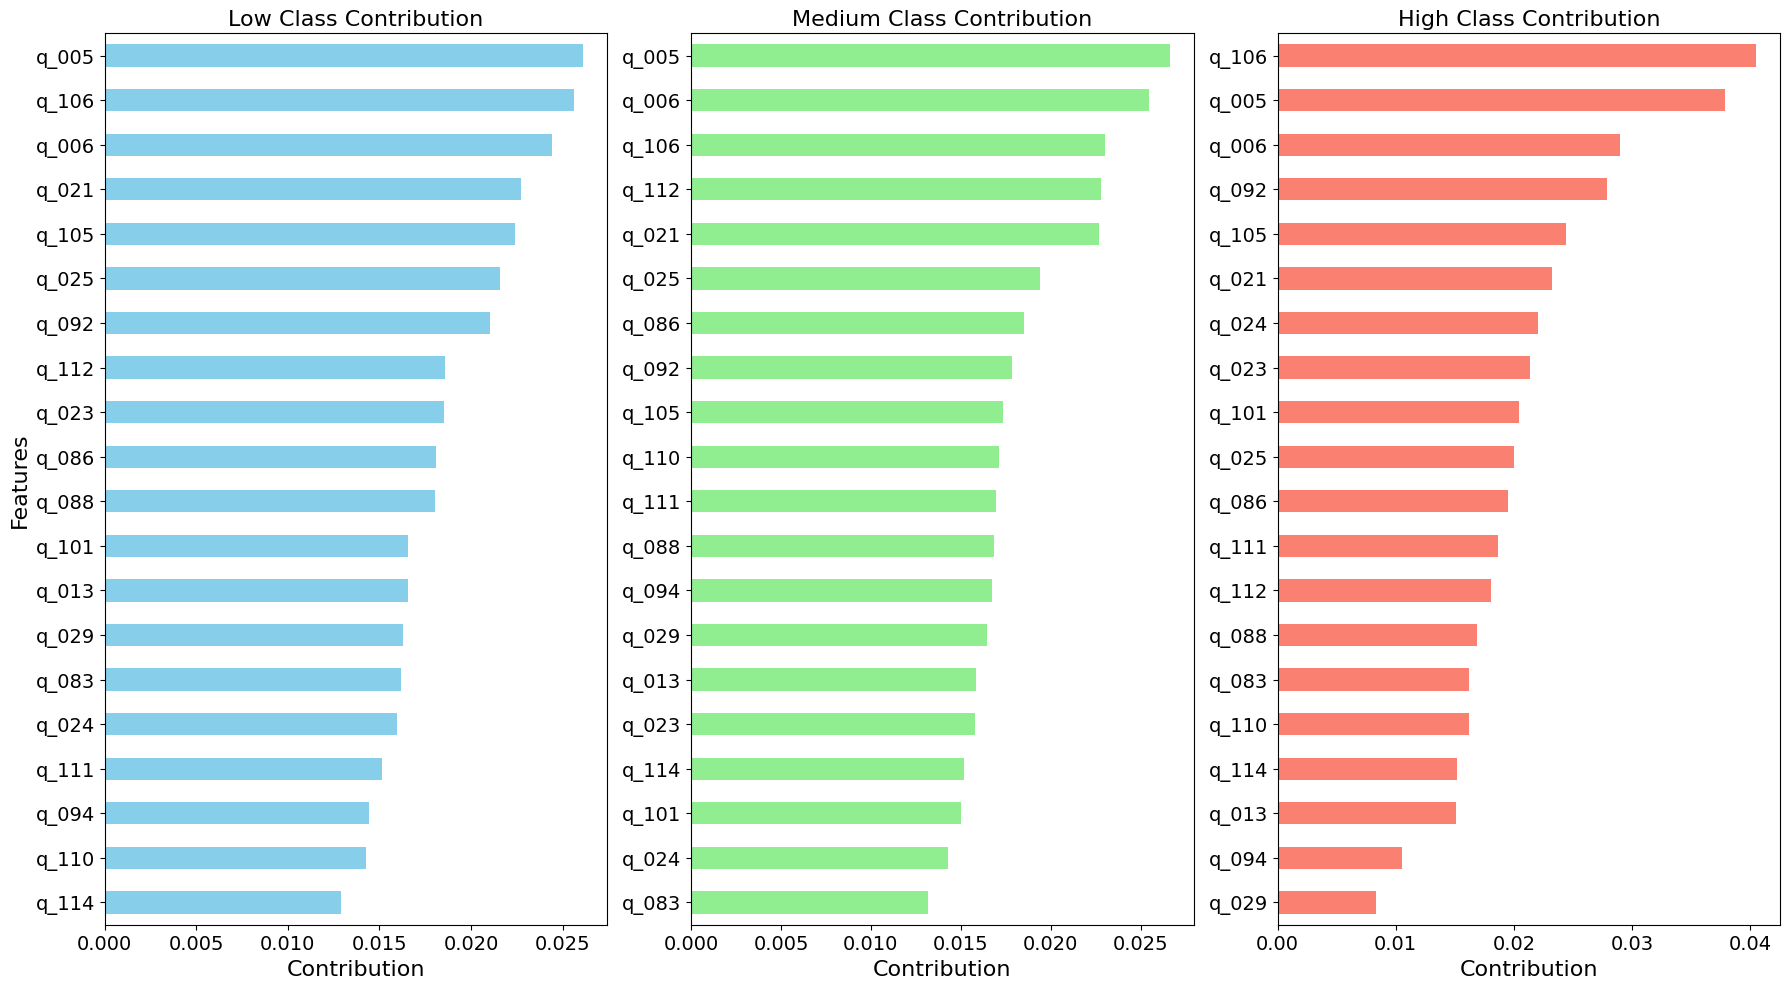

In [30]:
# Sort the dataframe by the highest-contributing feature in each class
df_sorted_low = top_features.sort_values('Low', ascending=False)
df_sorted_medium = top_features.sort_values('Medium', ascending=False)
df_sorted_high = top_features.sort_values('High', ascending=False)

# Plotting using horizontal bars and sorted order from top to bottom for descending order on y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))

df_sorted_low['Low'].plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Low Class Contribution', fontsize=16)
axes[0].set_xlabel('Contribution', fontsize=16)
axes[0].set_ylabel('Features', fontsize=16)
axes[0].tick_params(axis='x', labelsize=14)  # Resize x-axis tick labels
axes[0].tick_params(axis='y', labelsize=14)  # Resize y-axis tick labels
axes[0].invert_yaxis()  # Invert y-axis to have the highest contributions at the top

df_sorted_medium['Medium'].plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Medium Class Contribution', fontsize=16)
axes[1].set_xlabel('Contribution', fontsize=16)
axes[1].tick_params(axis='x', labelsize=14)  # Resize x-axis tick labels
axes[1].tick_params(axis='y', labelsize=14)  # Resize y-axis tick labels
axes[1].invert_yaxis()

df_sorted_high['High'].plot(kind='barh', ax=axes[2], color='salmon')
axes[2].set_title('High Class Contribution', fontsize=16)
axes[2].set_xlabel('Contribution', fontsize=16)
axes[2].tick_params(axis='x', labelsize=14)  # Resize x-axis tick labels
axes[2].tick_params(axis='y', labelsize=14)  # Resize y-axis tick labels
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

### Feature Importance Plot
Each bar represents the average impact of a feature on the model's output. The length of the bar corresponds to the mean absolute SHAP value across all samples in the test set for that feature, which is a measure of the feature's importance. All features are ordered by overall importance (higher average impact on model output on top)

### Feature Contribution Percentage Plot
Provides a view of how much each feature contributes to the prediction for each class relative to the total contributions for that class.
Also shows the distribution of impact each feature has across the different classes.
Note the length of the bars do not have the same significance as in the feature importance plot, since the percentages are relative to each class.

#### Comments:
Across all features, q_005 seems to have the highest contribution (2.61%) in predicting Low Participation and Medium Participation (2.66%). q_106 seems to have the highest contribution in predicting High Participation (4.05%).

##### Top 3 influential features in predicting probability of `Low Participation`
- q_005: Small & medium scale community-owned renewable projects to achieve RE target
- q_106: Enabling local participation in energy decision making is a main RE benefit
- q_006: Medium & large scale corporate-owned renewables projects to achieve RE target

##### Top 3 influential features in predicting probability of `Medium Participation`
- q_005: Small & medium scale community-owned renewable projects to achieve RE target
- q_006: Medium & large scale corporate-owned renewables projects to achieve RE target
- q_106: Enabling local participation in energy decision making is a main RE benefit

##### Top 3 influential features in predicting probability of `High Participation`
- q_106: Enabling local participation in energy decision making is a main RE benefit
- q_005: Small & medium scale community-owned renewable projects to achieve RE target
- q_006: Medium & large scale corporate-owned renewables projects to achieve RE target

### 3.4 SHAP Summary Plot
Summary plots provide a birds-eye view of the feature importance and what is driving the predictions.



### 3.4a) For Class 'Low'

In [31]:
shap.summary_plot(shap_values[1], X_test, show=False)
plt.savefig("../figures/deep_summary_plot_low.png")  # Saves the plot as a PNG file
plt.close()  # Closes the plot to free up memory

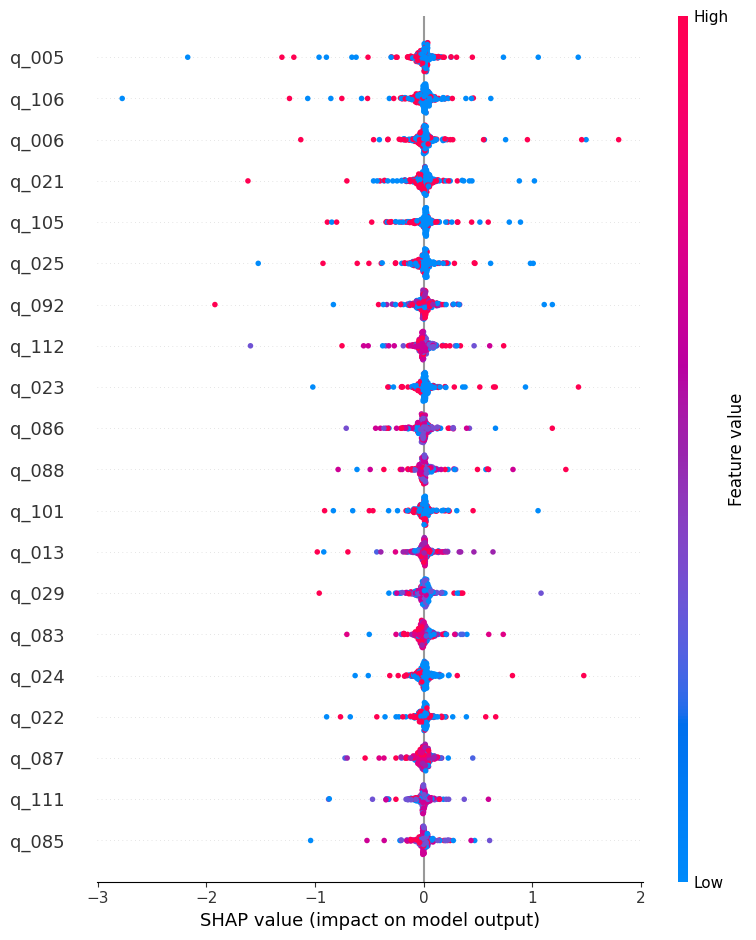

In [32]:
shap.summary_plot(shap_values[1], X_test)

When prediction outcome is **'Low'**, 
- Not thinking small & medium scale community-owned renewable projects should achieve RE target (q_005), not thinking enabling local participation in energy decision making is a main RE benefit (q_106), not thinking Medium & large scale corporate-owned renewables projects should achieve RE target (q_006), not having an electric vehicle (q_023) etc raise the prediction likelihood. 
- There being no really big divisions in my community about coal or gas (q_092), Seeing joining a community energy project is risky because the government may change the rules (taxes, subsidies) (q_112), Agreeing environmental problems are frequently exaggerated (q_083) etc lower the prediction likelihood. 

### 3.4b) For Class 'Medium'

In [33]:
shap.summary_plot(shap_values[2], X_test, show=False)
plt.savefig("../figures/deep_summary_plot_medium.png")  # Saves the plot as a PNG file
plt.close()  # Closes the plot to free up memory

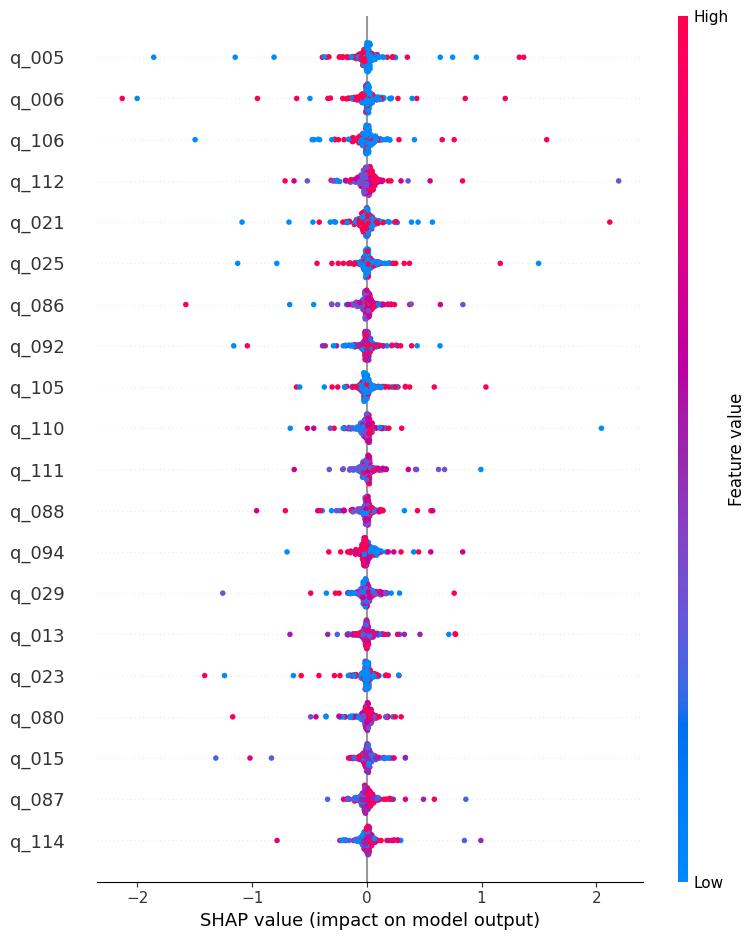

In [34]:
shap.summary_plot(shap_values[2], X_test)

When prediction outcome is **'Medium'**, 
- Not thinking small & medium scale community-owned renewable projects should achieve RE target (q_005), not thinking enabling local participation in energy decision making is a main RE benefit (q_106), not thinking Medium & large scale corporate-owned renewables projects should achieve RE target (q_006), seeing joining a community energy project is risky because the government may change the rules (taxes, subsidies) (q_112) etc increase the prediction likelihood.
- Having renewable energy installed (including solar PV, solar hot water, wind or bioenergy generators) (q_021), having more friends, neighbours or others already got household renewable energy (q_094), not having brownouts or blackouts as a problem (q_029) etc lower the prediction likelihood.

### 3.4c) For Class 'High'

In [35]:
shap.summary_plot(shap_values[0], X_test, show=False)
plt.savefig("../figures/deep_summary_plot_high.png")  # Saves the plot as a PNG file
plt.close()  # Closes the plot to free up memory

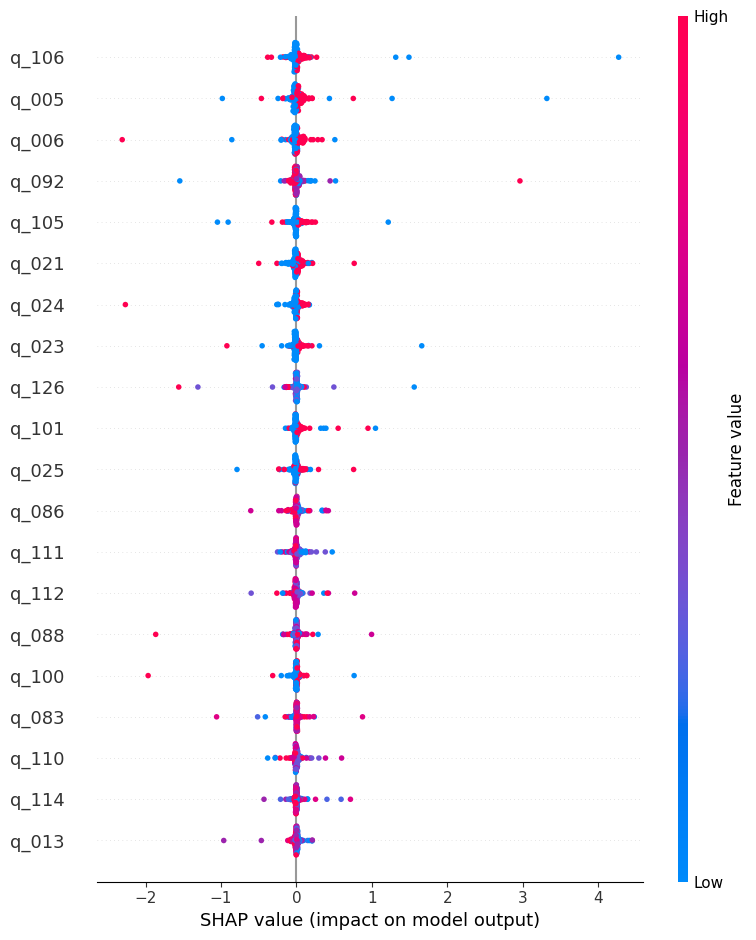

In [36]:
shap.summary_plot(shap_values[0], X_test)

When prediction outcome is **'High'**, 
- Thinking small & medium scale community-owned renewable projects should achieve RE target (q_005), thinking enabling local participation in energy decision making is a main RE benefit (q_106), thinking Medium & large scale corporate-owned renewables projects should achieve RE target (q_006), having renewable energy installed (including solar PV, solar hot water, wind or bioenergy generators) (q_021) etc increase the prediction likelihood.
- Not seeing community sponsorship and grant opportunities as a benefit of RE (q_105), not planning to install renewables (solar PV, solar hot water, home battery, wind or bioenergy generator) (q_024), not having barriers to generate renewables (for example renting, inappropriate roof, shading, unit complex etc) (q_025), seeing joining a community energy project as risky because the government may change the rules (taxes, subsidies) (q_112) etc decrease the prediction likelihood.

### 3.5. SHAP Dependence Plot
Dependence plots show the effect of a single feature across the whole dataset, which can highlight patterns in how the feature impacts the prediction.

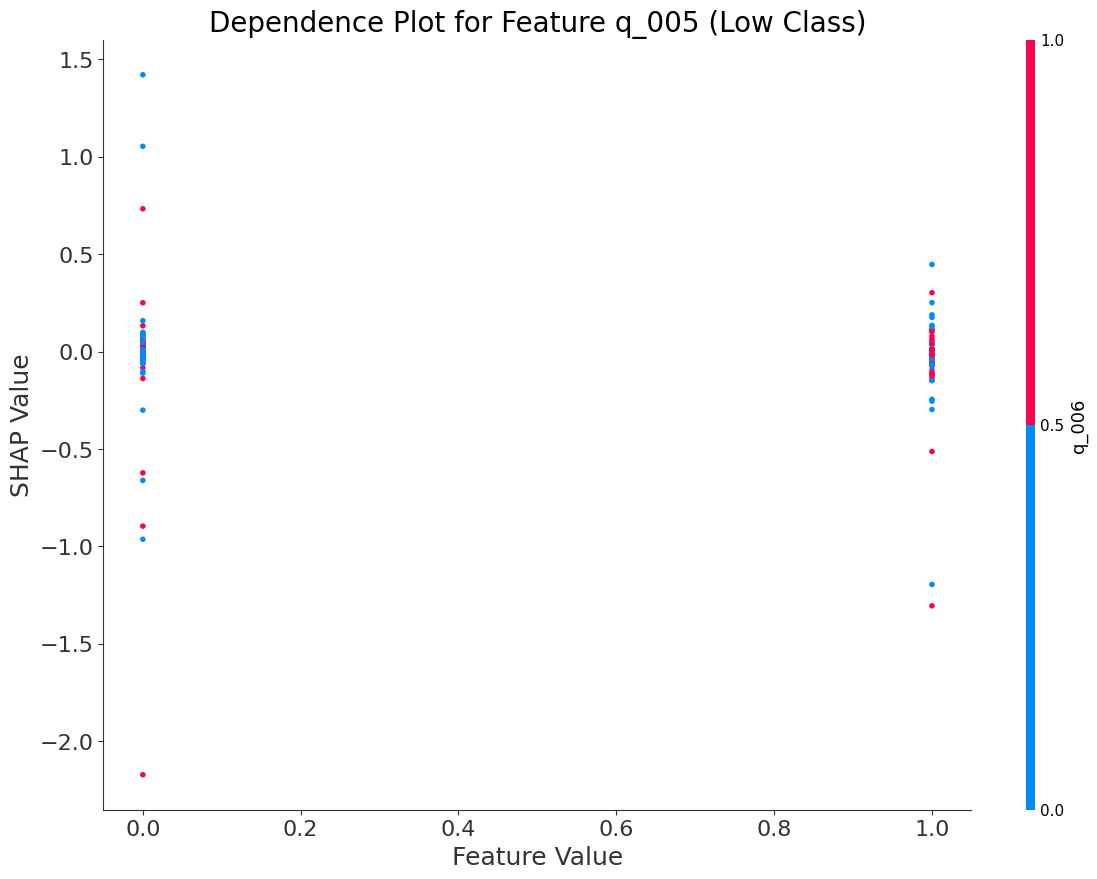

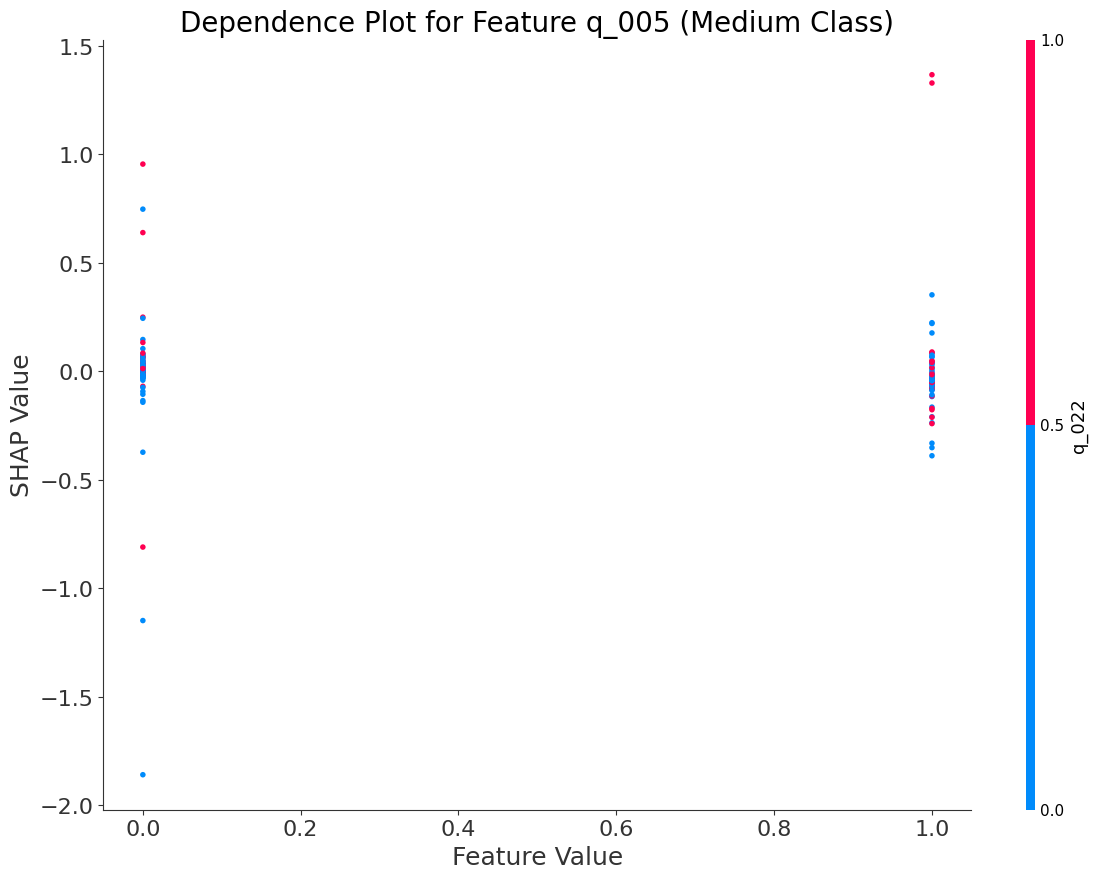

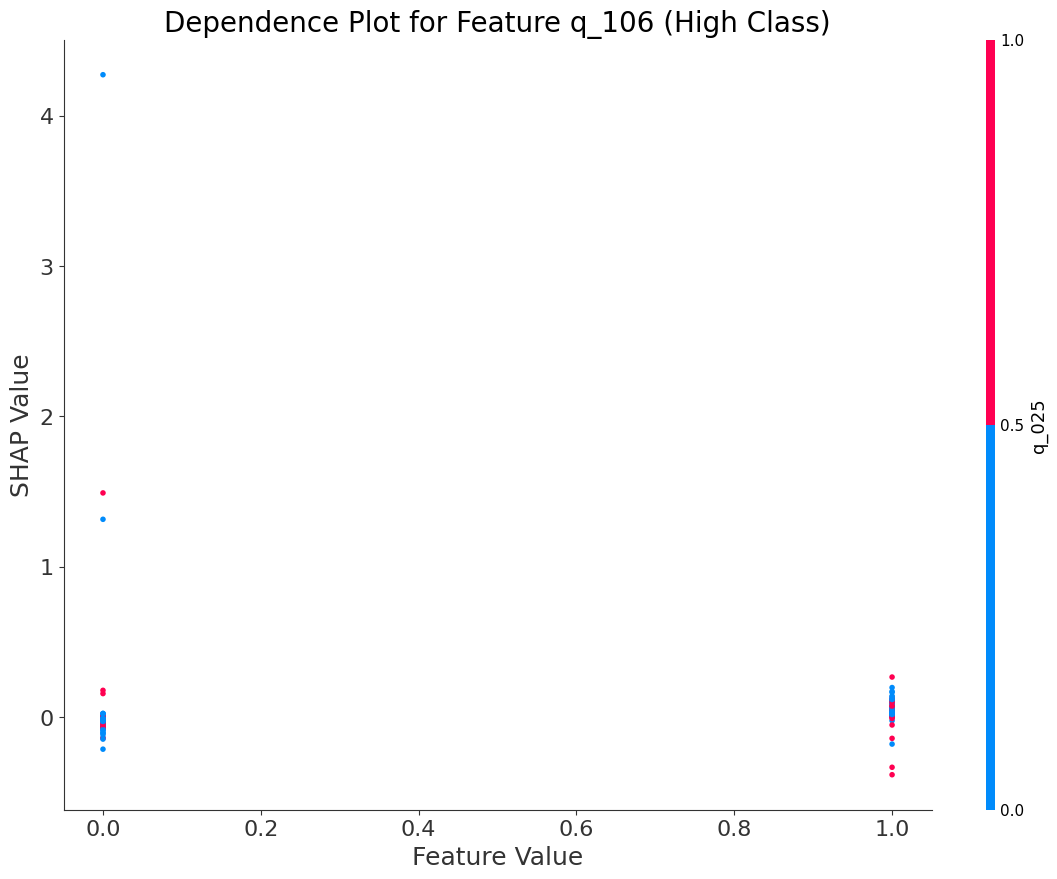

In [37]:
# 'Low' Class
fig, ax = plt.subplots(1, 1, figsize=(14,10))
shap.dependence_plot('q_005', shap_values[1], X_test, interaction_index="auto", ax=ax, show=False)
# Adjust label sizes on the x and y axes, as well as the title and tick parameters
ax.set_title('Dependence Plot for Feature q_005 (Low Class)', fontsize=20)
ax.set_xlabel('Feature Value', fontsize=18)
ax.set_ylabel('SHAP Value', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# 'Medium' Class
fig, ax = plt.subplots(1, 1, figsize=(14,10))
shap.dependence_plot('q_005', shap_values[2], X_test, interaction_index="auto", ax=ax, show=False)
ax.set_title('Dependence Plot for Feature q_005 (Medium Class)', fontsize=20)
ax.set_xlabel('Feature Value', fontsize=18)
ax.set_ylabel('SHAP Value', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# 'High' Class
fig, ax = plt.subplots(1, 1, figsize=(14,10))
shap.dependence_plot('q_106', shap_values[0], X_test, interaction_index="auto", ax=ax, show=False)
ax.set_title('Dependence Plot for Feature q_106 (High Class)', fontsize=20)
ax.set_xlabel('Feature Value', fontsize=18)
ax.set_ylabel('SHAP Value', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

##### Top influencer for Low:
- q_005: Small & medium scale community-owned renewable projects to achieve RE target
- Most interactive: q_006: Medium & large scale corporate-owned renewables projects to achieve RE target

#### Top influencer for Medium:
- q_005: Small & medium scale community-owned renewable projects to achieve RE target
- Most interactive: q_022: I have a battery for electricity storage

##### Top ininfluencer for High: 
- q_106: Enabling local participation in energy decision making is a main RE benefit
- Most interactive: q_025: I want to generate some or more renewable energy but currently have barriers (for example renting, inappropriate roof, shading, unit complex etc)

##### Comments:
- Low Class: 'Yes' to q_005 and 'Yes' to q_006 together contribute positively to predicting the class. Having 'No' to q_005 and 'No' to q_006 together contribute negatively.
- Medium Class: When it's a 'Yes' to q_005, the response ('Yes' or 'No') of q_022 can go either prediction direction, although 'Yes' to q_022 seem to have relatively more positive effect. Likewise when it's a 'No' to q_005, the response of q_022 can go either prediction direction, although 'Yes' to q_022 seem to have relatively more negative effect.
- High Class: Saying 'No' to q_106 and q_025 contribute negatively to predicting the class. Having 'Yes' to q_106 and 'Yes' to q_025 contribute positively.